In [1]:
import numpy as np
import pandas as pd
import os

from bec import *
from monet import *
import al_utils
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')

np.random.seed(69)

In [2]:
harmonic_sims = [ sim(g, config) for g in np.linspace(0, 10, 300)]
tr, te, va = make_dataset(harmonic_sims)

In [20]:
gp = GPApproximation()
data = tr.sample(500)
gp.fit(data[['x', 'g']], data.psi)
print(f"### Trained GP in train dataset")



### Trained GP in train dataset


In [21]:
def evaluate(gp, harmonic_sims, low=1, high=100, n=100):
    
    def _evaluate(g):
        gt = get_closest_sim(harmonic_sims, g)
        pr, pr_sigma = gp.predict(gt[['x', 'g']])
        return ((pr - gt.psi)**2).sum().mean()
    
    return np.array([_evaluate(g) for g in np.linspace(low, high, n)]).mean()

In [ ]:
gp_hp_loss = evaluate(gp, harmonic_sims, low=10, high=15)
print(f"### Loss of the trained GP - {gp_hp_loss}")

### Loss of the trained GP - 1.5992267849681998e-05


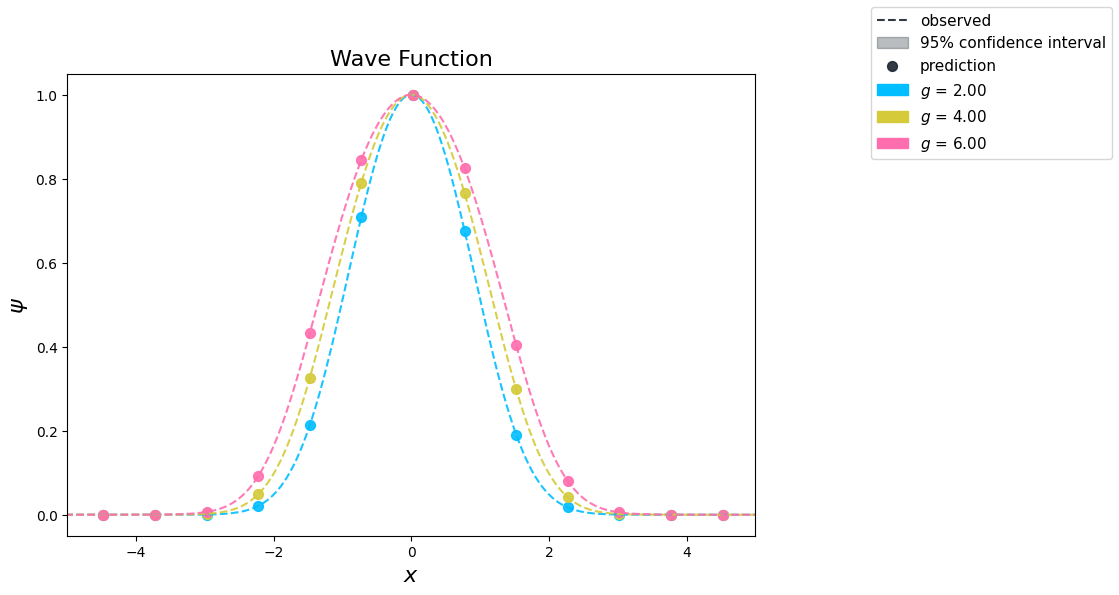

In [33]:
save_path = "HP_exp"
if os.path.isdir(save_path) == False:
    os.mkdir(save_path)
al_utils.plot([2, 4, 6], harmonic_sims, gp, save_file=os.path.join(save_path, f'{save_path}.svg'), act_op=False, min_gs=-5, max_gs=5)


###Starting active learning Process
Loss for 51 - nan
Got min loss
Loss for 52 - 0.10635061814613714
Got min loss
Loss for 53 - 0.10613772763321722
Got min loss
Loss for 54 - 0.10546909140019663
Loss for 55 - 0.11770366960860178
Loss for 56 - 0.11589000650126566
Loss for 57 - 0.11359270922991462
Loss for 58 - 0.11164408000732418
Loss for 59 - 0.11033761135942363
Loss for 60 - 0.10815177547126607
Got min loss
Loss for 61 - 0.09585485029210408
Got min loss
Loss for 62 - 0.09386080991308336
Got min loss
Loss for 63 - 0.0926256956531664
Got min loss
Loss for 64 - 0.014295406152467046
Loss for 65 - 0.014831666913395663
Loss for 66 - 0.014812592888590019
Got min loss
Loss for 67 - 0.012490793942697816
Got min loss
Loss for 68 - 0.011823426494272031
Loss for 69 - 0.012325218309815781
Got min loss
Loss for 70 - 0.011662096741817866
Loss for 71 - 0.011745668895560012
Got min loss
Loss for 72 - 0.010608538874466814
Loss for 73 - 0.010989522984611361
Loss for 74 - 0.052486048527935474
Loss for 75

KeyboardInterrupt: 

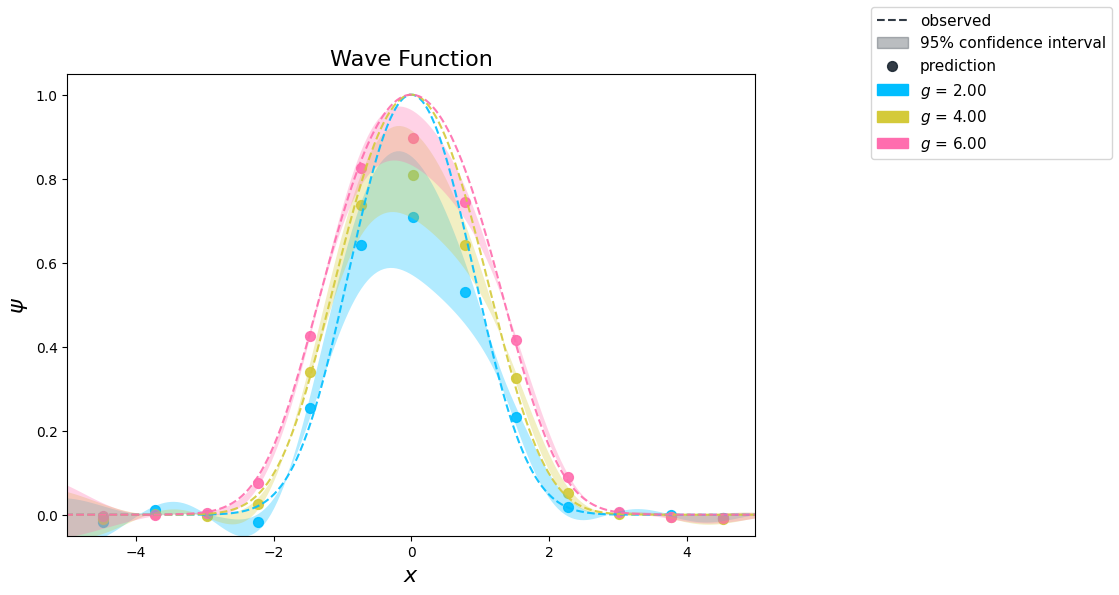

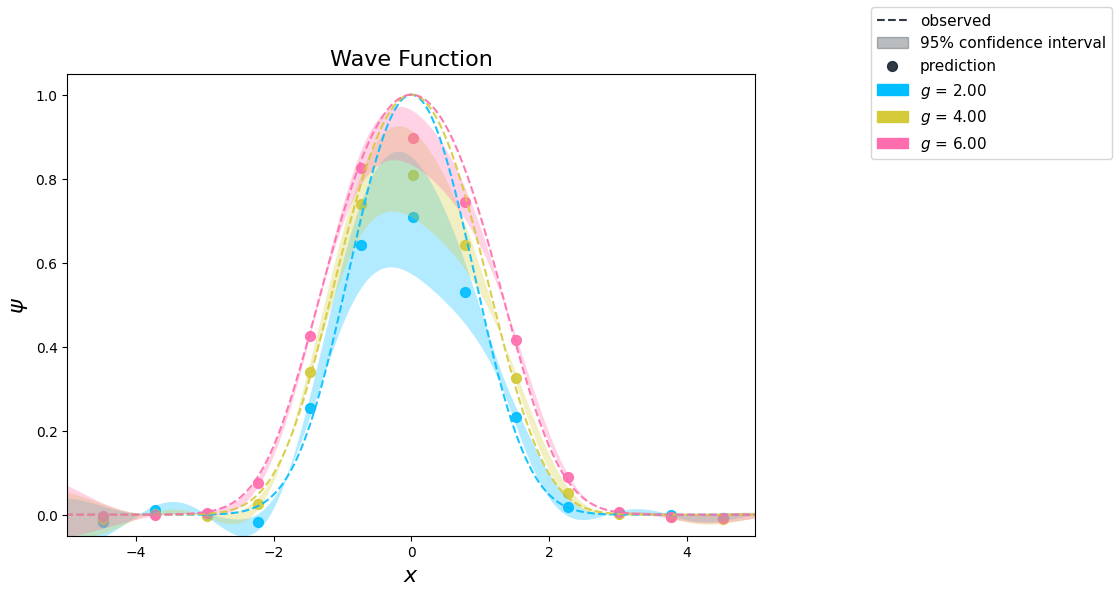

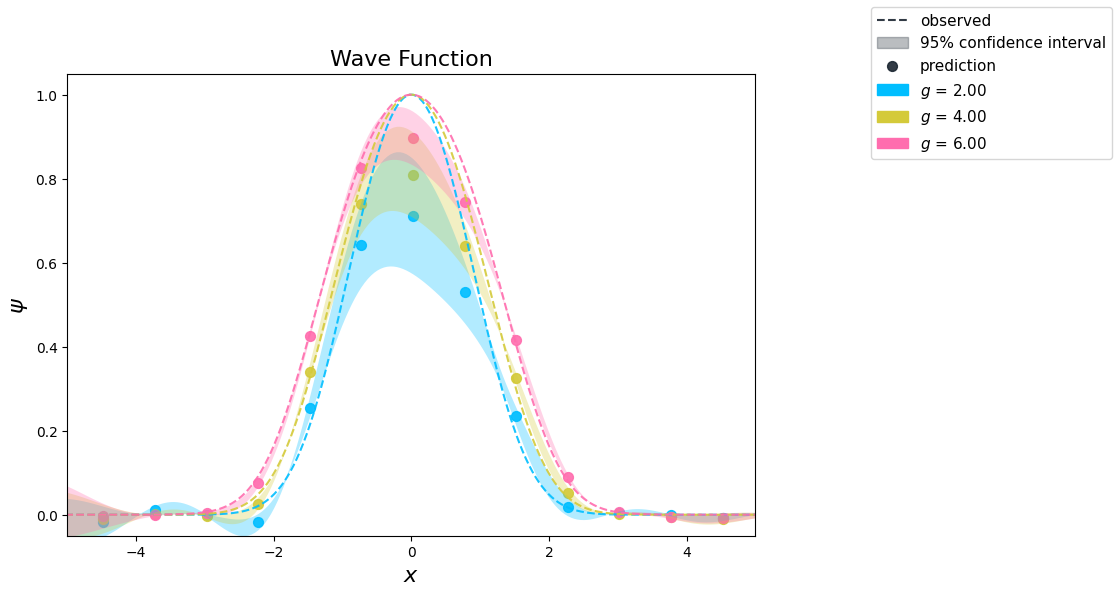

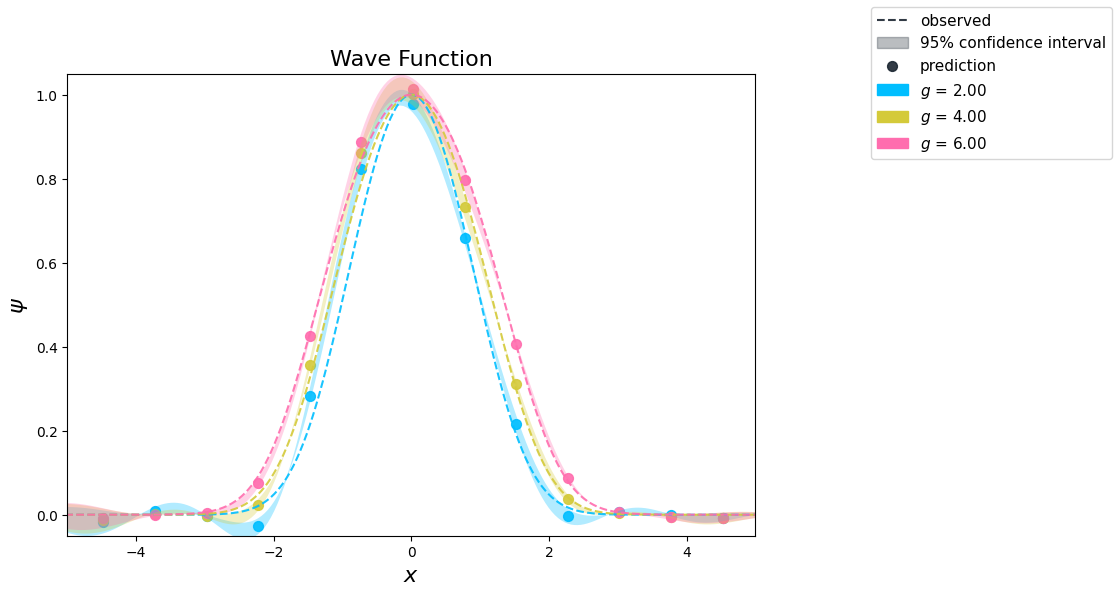

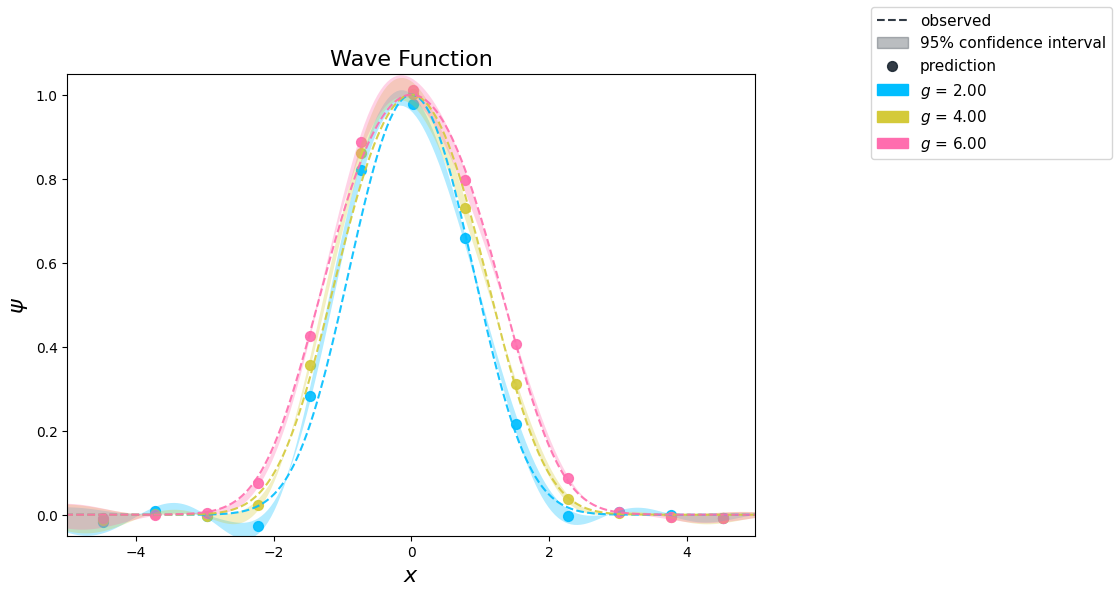

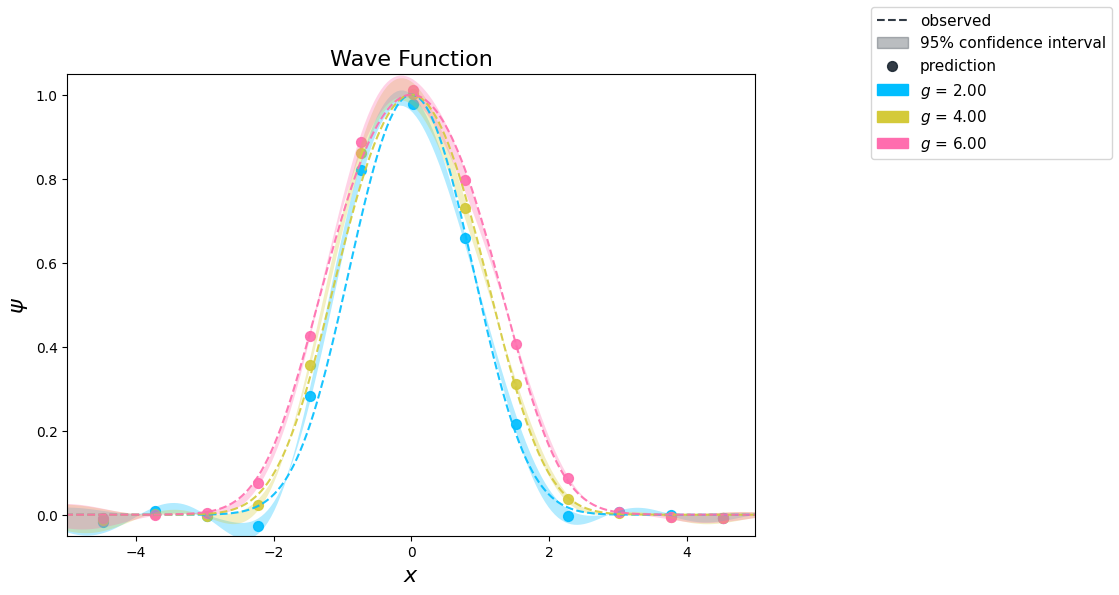

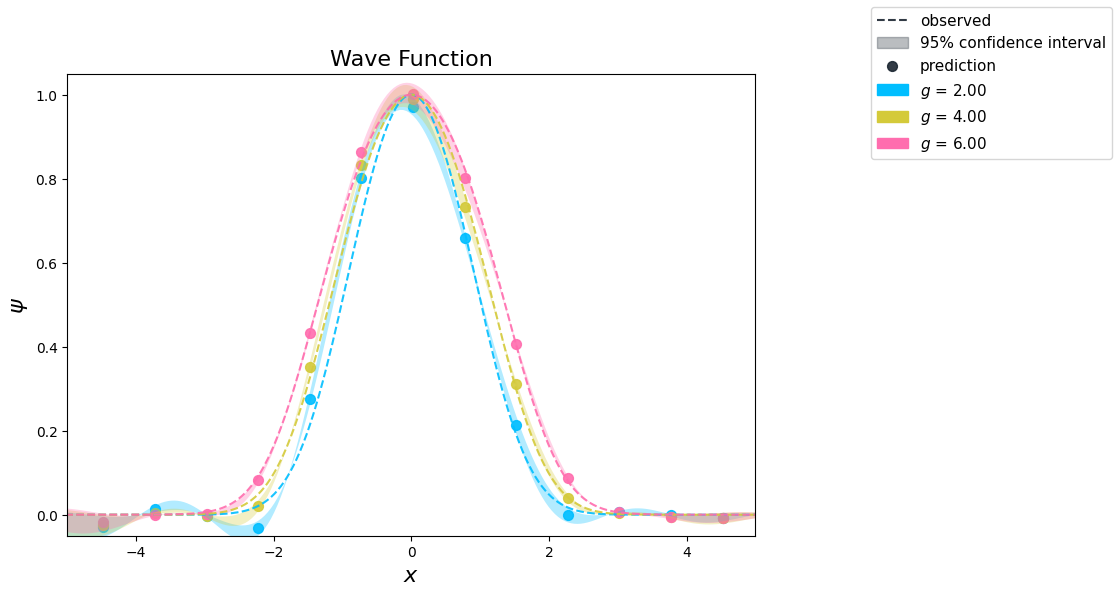

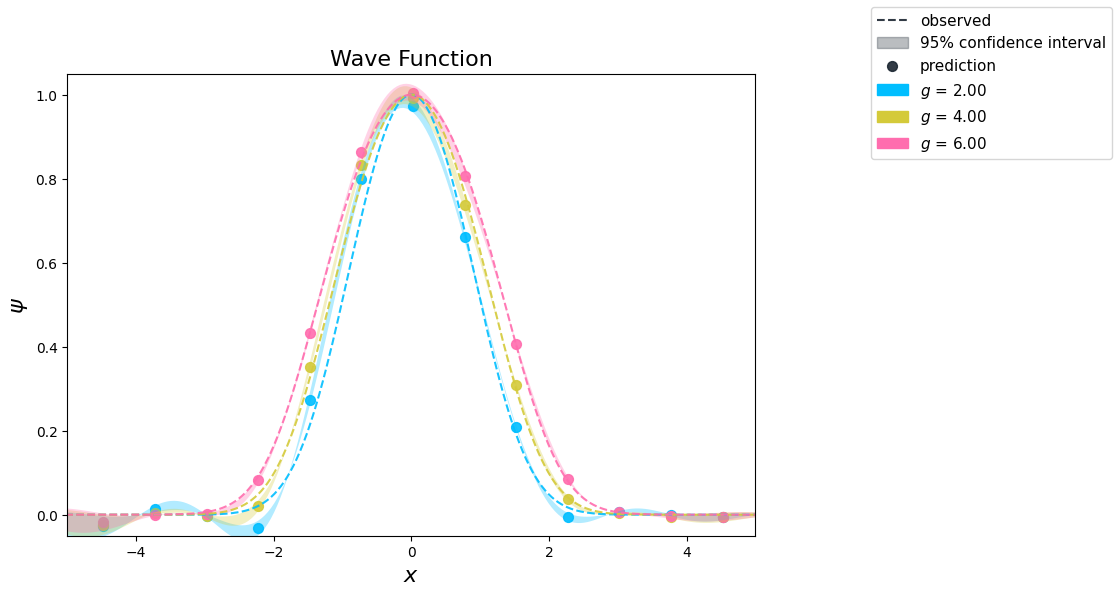

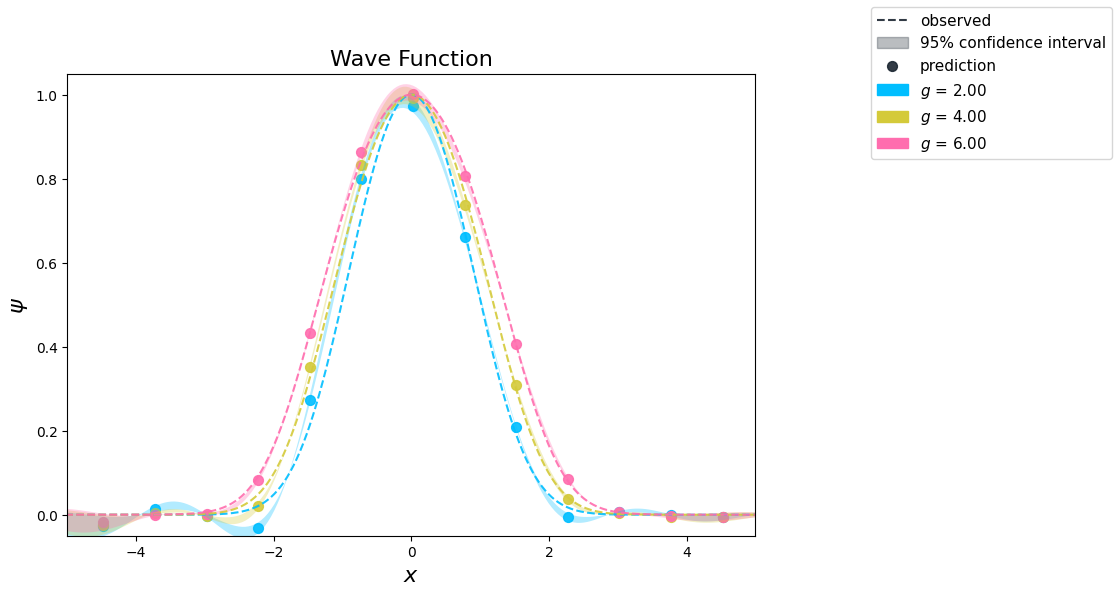

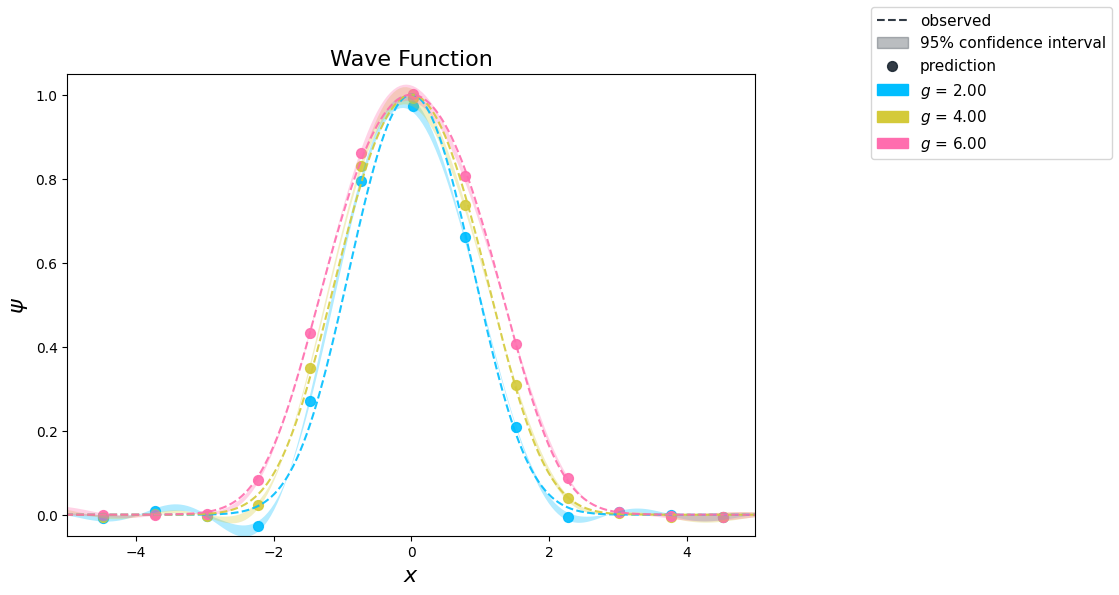

In [ ]:
print(f"###Starting active learning Process")
kernel = C(1.0, (1e-3, 1e3)) * RBF([5, 5], (1e-2, 1e2))
regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
ids = [int(i) for i in np.linspace(0, len(tr)-1, 50)]
aclrnr = al_utils.ActLearn(
    regressor=regressor,
    init_ids=ids,
    trn_data=tr,
    save_path=save_path,
    compare_loss=gp_hp_loss,
    exp_name='Harmonic Potential'
)
aclrnr.train(harmonic_sims, low=10, high=15, gs=[2, 4, 6], min_gs=-5, max_gs=5)

